     OrderID     Product  Quantity  Price  Sales Customer   OrderDate
0       1001  Headphones         4   2500  10000   George  2025-04-03
1       1002    Keyboard         4   1500   6000   George  2025-01-21
2       1003       Mouse         3    500   1500      Bob  2025-03-16
3       1004     Printer         4   8000  32000   Hannah  2025-04-14
4       1005    Keyboard         2   1500   3000    Alice  2025-02-22
..       ...         ...       ...    ...    ...      ...         ...
195     1196     Monitor         2  10000  20000      Bob  2025-06-16
196     1197       Mouse         2    500   1000   George  2025-01-19
197     1198      Tablet         3  20000  60000    Ethan  2025-06-22
198     1199       Mouse         4    500   2000    Alice  2025-05-06
199     1200     Monitor         4  10000  40000   George  2025-03-02

[200 rows x 7 columns]
   OrderID     Product  Quantity  Price  Sales Customer   OrderDate
0     1001  Headphones         4   2500  10000   George  2025-04-03


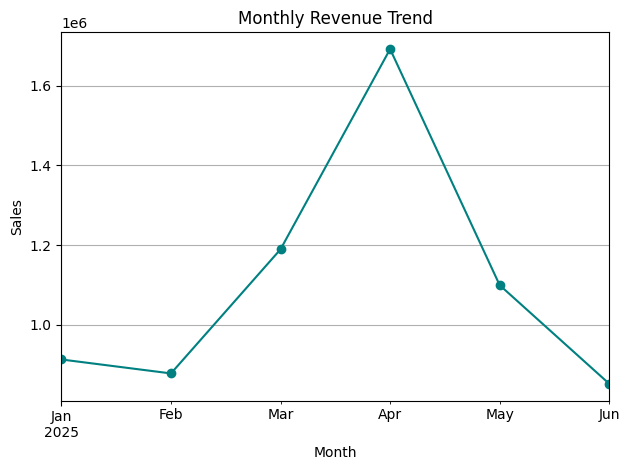

Customer_Wise_purchase: Customer
Alice      501500
Bob        908500
Daisy      742000
Ethan      759500
Fiona     1165000
George     410500
Hannah    1256500
John       880500
Name: Sales, dtype: int64
Top Customer: {top_customer} with ₹{top_amount}
Number of Orders per Product: Product
Mouse         35
Headphones    33
Laptop        33
Monitor       30
Printer       27
Keyboard      25
Tablet        17
Name: count, dtype: int64


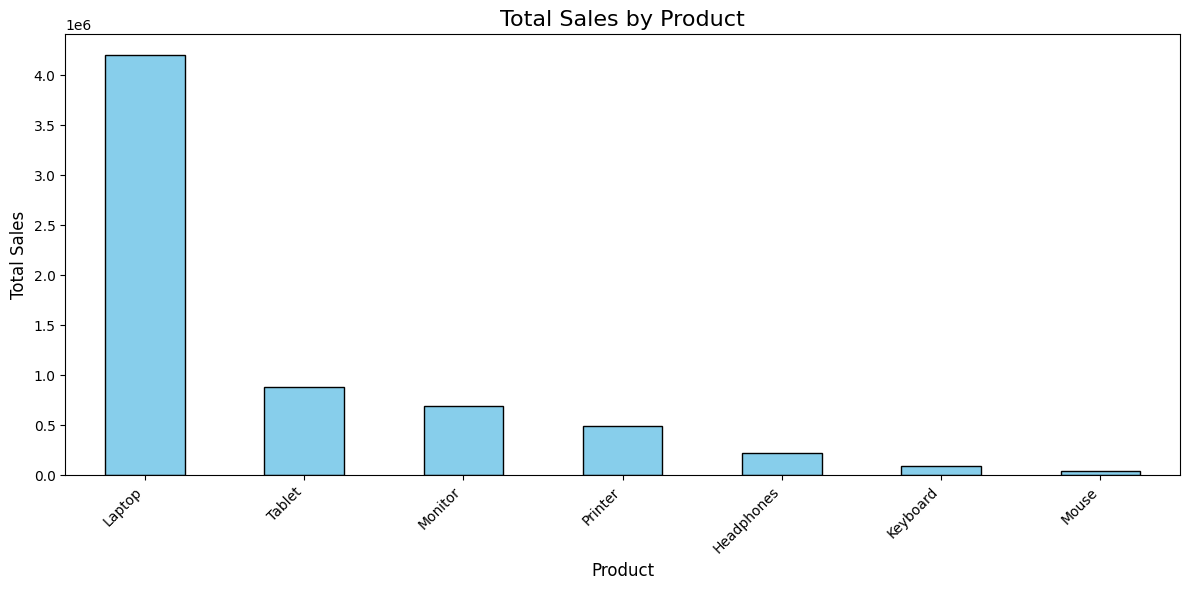

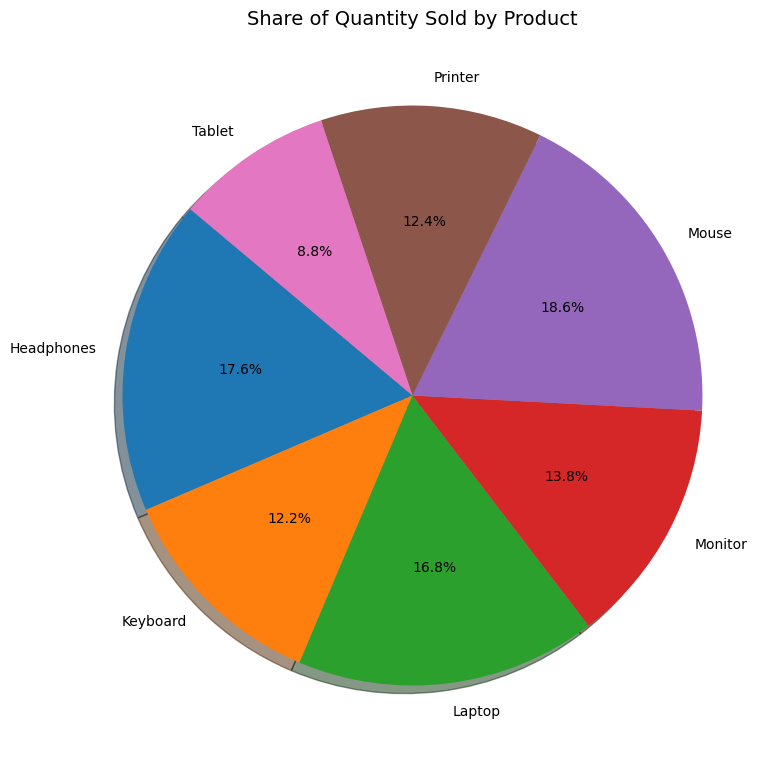

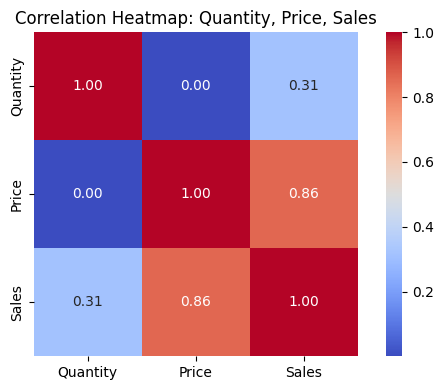

In [3]:
# IMPORT DATA SET AND OUTPUT 1ST AND LAST 5 FOR PRINT VERIABLE

import pandas as pd
a = pd.read_csv("/content/Retail_Sales_Data.csv")
print(a)

#IMPORT DATA SET AND OUTPUT 1ST 5 FOR PRINT VERIABLE

b = pd.read_csv("Retail_Sales_Data.csv")
print(a.head())

# CHECKING UPLOADED DATA SET DATA TYPE AND NULL VALUE

print(a.info())

#___________________________________________________________________________

# TOTAL SALES REVENE

total_sales = a['Sales'].sum()
print(" Total Sales (Revenue):", total_sales)

# IF I HAVE NO SALES VALUE

Amount_= a['Quantity'] * a['Price']
print(Amount_)
print("Total Revenue:", sum(Amount_))

#___________________________________________________________________________

# Average Order Value

x = total_sales/ 200
print("Average Order Value :", x)

y = total_sales/len(a)
print("Average Order Value:",(y))

#_______________________________________________________________

#  Top 5 Products by Sales


p = a.groupby('Product')['Quantity'].sum()
print(p)

pp = (a.groupby('Product')['Quantity'].sum().nlargest(5).reset_index(name="Total_Quantity_Sold"))
print(pp)
#______________________________________________________________________________________________________________

# Monthly Revenue Trends

a['OrderDate'] = pd.to_datetime(a['OrderDate'])
a['Month'] = a['OrderDate'].dt.to_period('M')
monthly_sales = a.groupby('Month')['Sales'].sum()
print(monthly_sales)

# Plot Monthly Revenue
import matplotlib.pyplot as plt
monthly_sales.plot(kind='line', marker='o', title='Monthly Revenue Trend', color='teal')
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()
#_____________________________________________________________________________________

# Customer-wise Total Purchase

ctp = a.groupby('Customer')['Sales'].sum()
print('Customer_Wise_purchase:',ctp)


#____________________________________________________________
# Top customer
top_customer = ctp.idxmax()
top_amount = ctp.max()
print("Top Customer: {top_customer} with ₹{top_amount}")

#___________________________________________________________________________

#  Orders per Product
product_orders = a['Product'].value_counts()
print("Number of Orders per Product:", product_orders.head(10))

#_______________________________________________________________________________

# plot – Sales by product
import matplotlib.pyplot as plt

#  Group sales by product
product_sales = a.groupby('Product')['Sales'].sum().sort_values(ascending=False)

#  Plot the bar chart
plt.figure(figsize=(12, 6))  # Set the figure size (width, height)
product_sales.plot(kind='bar', color='skyblue', edgecolor='black')

#  Add chart details
plt.title('Total Sales by Product', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate product names for better visibility
plt.tight_layout()

#  Show the plot
plt.show()

#__________________________________________________________________________________________________

# 	Pie chart – Share of each product
import matplotlib.pyplot as plt

#  Group by product and sum the quantity sold
product_quantity = a.groupby('Product')['Quantity'].sum()

#  Plot the pie chart
plt.figure(figsize=(8, 8))  # Square figure for a round pie
plt.pie(
    product_quantity,
    labels=product_quantity.index,
    autopct='%1.1f%%',     # Show percentage on slices
    startangle=140,        # Rotate start angle for better look
    shadow=True            # Adds a slight shadow
)

#  Add title and show chart
plt.title('Share of Quantity Sold by Product', fontsize=14)
plt.tight_layout()
plt.show()

#_________________________________________________________________________________

# Heatmap – Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  Select relevant numeric columns
corr_df = a[['Quantity', 'Price', 'Sales']]

# Step 2: Compute correlation matrix
corr_matrix = corr_df.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_matrix,
    annot=True,        # Show correlation values
    cmap='coolwarm',   # Color gradient from blue to red
    fmt='.2f',         # Format decimals
    square=True        # Square cells
)

# Step 4: Add title and show plot
plt.title('Correlation Heatmap: Quantity, Price, Sales')
plt.tight_layout()
plt.show()